# A demonstration of the `shaded_normal_density` function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from scipy import stats


def shaded_normal_density(
    q: float | tuple[float, float],
    /,
    mean: float = 0,
    sd: float = 1,
    rsd: float = 4,
    lower_tail: bool = True,
    add_prob: bool = True,
    add_q: bool = True,
    add_legend: bool = False,
    figsize: tuple[float, float] | None = (8, 6),
    color: str = "xkcd:sky blue",
    x_label: str = "x",
    y_label: str = "f(x; μ,σ)",
    legend_text: str | None = None,
    **kwargs,
) -> Figure:
    """
    Generate a normal distribution plot with optional listed probability calculation.

    Parameters
    ----------
    q : float or tuple of 2 floats
        If a float, the upper or lower bound of the shaded area. If a tuple of floats, the lower and upper bounds of the shaded area.
    mean : float, default: 0
        The mean of the normal distribution.
    sd : float, default: 1
        The standard deviation of the normal distribution.
    rsd : float, default: 4
        The number of standard deviations to plot on either side of the mean=.
    lower_tail : bool, default: True
        Whether the shaded area should represent the lower tail probability P(X <= x) (True) or the upper tail probability P(X > x) (False).
    add_prob : bool, default: True
        Whether to show the probability of the shaded area will be displayed on the plot.
    add_q : bool, default: True
        Whether the value(s) of `q` should be displayed on the x-axis of the plot.
    add_legend : bool, default: False
        Whether a legend with the mean and standard deviation values will be displayed on the plot.
    figsize : tuple of 2 floats or None, default: (8, 6)
        The size of the plot in inches. If None, the default matplotlib figure size will be used as this is passed to `matplotlib.pyplot.figure`.
    color : color, default: 'xkcd:sky blue'
        The color of the shaded area as a valid `matplotlib color <https://matplotlib.org/stable/users/explain/colors/colors.html>`__.
    x_label : str, default: 'x'
        The label for the x-axis.
    y_label : str, default: 'f(x; μ,σ)'
        The label for the y-axis.
    legend_text : str or None, optional
        The text to display in the legend if add_legend is set to true. By default (None), the legend will display the mean and standard deviation values.
    **kwargs
        Additional keyword arguments to pass to `matplotlib.pyplot.figure`.

    Returns
    -------
    matplotlib.figure.Figure
        The generated matplotlib Figure object.

    Raises
    ------
    TypeError
        If the input parameters are not of the expected type.
    ValueError
        If the input values are out of the expected range.

    References
    ----------
    Based off of an R function written by Dr. Irene Vrbick for making `shaded normal density curves <https://irene.vrbik.ok.ubc.ca/blog/2021-11-04-shading-under-the-normal-curve/>`__.

    The R function by Dr. Irene Vrbick was adapted from `here <http://rstudio-pubs-static.s3.amazonaws.com/78857_86c2403ca9c146ba8fcdcda79c3f4738.html>`__.
    """
    if not isinstance(mean, (float, int)):
        raise TypeError(f"mean must be a number, not a {mean.__class__.__name__!r}")
    if not isinstance(sd, (float, int)):
        raise TypeError(f"sd must be a number, not a {sd.__class__.__name__!r}")
    if not isinstance(rsd, (float, int)):
        raise TypeError(f"rsd must be a number, not a {rsd.__class__.__name__!r}")
    if (
        isinstance(q, tuple)
        and len(q) == 2
        and isinstance(q[0], (float, int))
        and isinstance(q[1], (float, int))
    ):
        q_lower, q_upper = sorted(q)
        xx = np.linspace(mean - rsd * sd, mean + rsd * sd, 200)
        yy = stats.norm.pdf(xx, mean, sd)
        fig = plt.figure(figsize=figsize, **kwargs)
        ax = fig.gca()
        ax.plot(xx, yy)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        x = np.linspace(q_lower, q_upper, 200)
        y = stats.norm.pdf(x, mean, sd)
        # fmt: off
        filled, *_ = ax.fill(  # Fill returns a list of polygons, but we're  only making one
            np.concatenate([[q_lower], x, [q_upper]]),
            np.concatenate([[0], y, [0]]),
            color,
        )
        # fmt: on
        if add_prob:
            height = max(y) / 4
            rv = stats.norm(mean, sd)
            prob: float = rv.cdf(q_upper) - rv.cdf(q_lower)
            ax.text((sum(q) / 2), height, f"{prob:.3f}", ha="center")
        if add_q:
            ax.set_xticks(
                [q_lower, q_upper],
                labels=[
                    str(round(q_lower, 4)),
                    str(round(q_upper, 4)),
                ],
                minor=True,
                color=color,
                y=-0.05,
            )
            if q_lower in ax.get_xticks():
                ax.get_xticklabels()[
                    np.where(ax.get_xticks() == q_lower)[0][0]
                ].set_color(color)
            if q_upper in ax.get_xticks():
                ax.get_xticklabels()[
                    np.where(ax.get_xticks() == q_upper)[0][0]
                ].set_color(color)

    elif isinstance(q, (float, int)):
        if not isinstance(lower_tail, bool):
            raise TypeError(
                f"lower_tail must be a bool, not a {lower_tail.__class__.__name__!r}"
            )

        xx = np.linspace(mean - rsd * sd, mean + rsd * sd, 200)
        yy = stats.norm.pdf(xx, mean, sd)
        fig = plt.figure(figsize=figsize, **kwargs)
        ax = fig.gca()
        ax.plot(xx, yy)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)

        if lower_tail is True:
            x = np.linspace(xx[0], q, 100)
            y = stats.norm.pdf(x, mean, sd)
            # fmt: off
            filled, *_ = ax.fill(  # Fill returns a list of polygons, but we're  only making one
                np.concatenate([[xx[0]], x, [q]]),
                np.concatenate([[0], y, [0]]),
                color,
            )
            # fmt: on
            if add_prob:
                height: float = stats.norm.pdf(q, mean, sd) / 4  # type: ignore
                prob: float = stats.norm.cdf(q, mean, sd)  # type: ignore
                ax.text((q - 0.5 * sd), height, f"{prob:.3f}", ha="center")
        else:
            x = np.linspace(q, xx[-1], 100)
            y = stats.norm.pdf(x, mean, sd)
            # fmt: off
            filled, *_ = ax.fill(  # Fill returns a list of polygons, but we're  only making one
                np.concatenate([[q], x, [xx[-1]]]),
                np.concatenate([[0], y, [0]]),
                color,
            )
            # fmt: on
            if add_prob:
                height: float = stats.norm.pdf(q, mean, sd) / 4  # type: ignore
                prob: float = stats.norm.sf(q, mean, sd)  # type: ignore
                ax.text((q + 0.5 * sd), height, f"{prob:.3f}", ha="center")

        if add_q:
            if q in ax.get_xticks():
                ax.get_xticklabels()[np.where(ax.get_xticks() == q)[0][0]].set_color(
                    color
                )
            else:
                ax.set_xticks(
                    [q],
                    labels=[
                        str(round(q, 4)),
                    ],
                    minor=True,
                    color=color,
                    y=-0.05,
                )

    else:
        error_base = "q must be a tuple of two numbers, or a single number"
        if isinstance(q, tuple):
            if len(q) != 2:
                raise ValueError(f"{error_base}, not a {len(q)}-tuple")
            raise TypeError(
                f"{error_base}, not a 2-tuple containing a {q[0].__class__.__name__!r} and a {q[1].__class__.__name__!r}"
            )
        else:
            raise TypeError(f"{error_base}, not a {q.__class__.__name__!r}")

    if add_legend:
        ax.set_title(legend_text or f"μ = {mean}, σ = {sd}")

    return fig

## Lower tail probabilities 

#### $P(Z\leq z)$

Shading the region $P(Z\leq z)$ where $Z∼N(0,1)$ is the standard normal $N(0,1)$

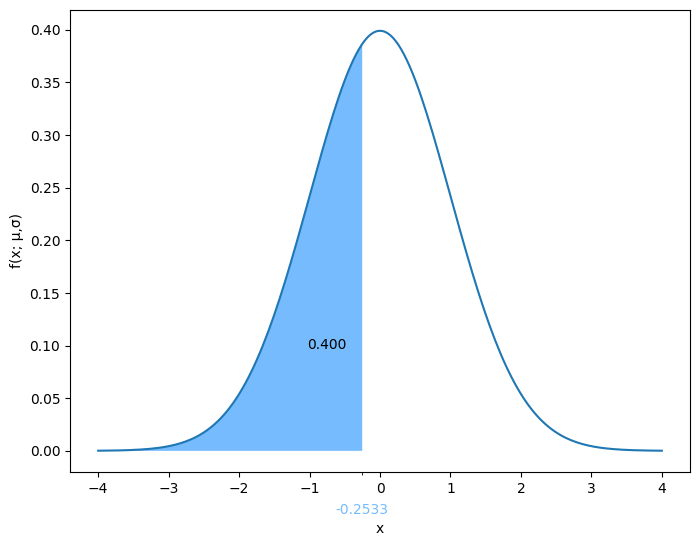

In [2]:
ex1 = shaded_normal_density(-0.2533)

#### $P(X\leq x)$

Shades in the region $P(X\leq x)$ where $X∼N(μ,σ)$ is a normal distribution with mean $μ$ and standard deviation $σ$.

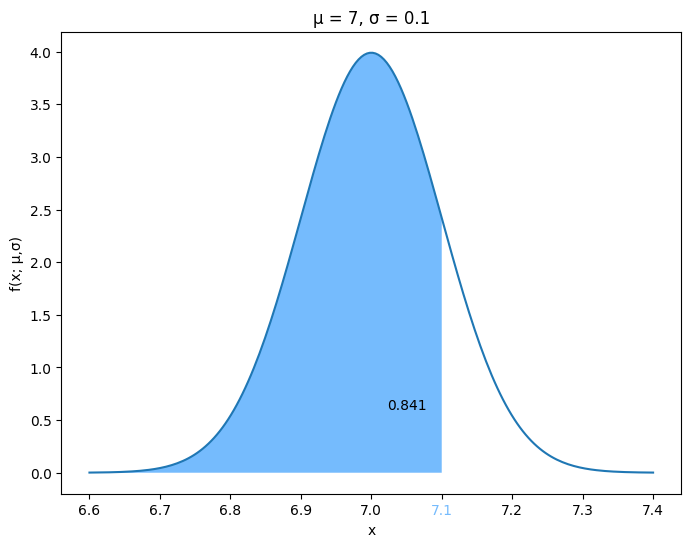

In [3]:
ex2 = shaded_normal_density(7.1, 7, 0.1, add_legend=True)

## Upper tail probabilities 

#### $P(Z\geq z)$

Shading the region $P(Z\geq z)$ where $Z∼N(0,1)$ is the standard normal $N(0,1)$

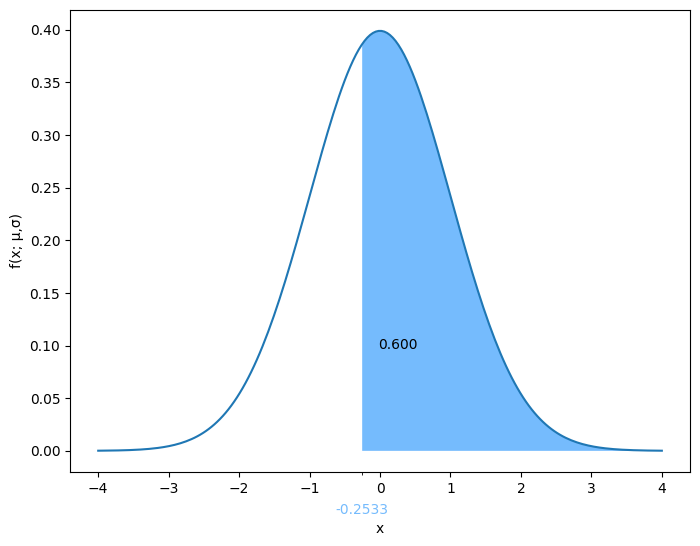

In [4]:
ex3 = shaded_normal_density(-0.2533, lower_tail=False)

#### $P(X\geq x)$

Shades in the region $P(X\geq x)$ where $X∼N(μ,σ)$ is a normal distribution with mean $μ$ and standard deviation $σ$.

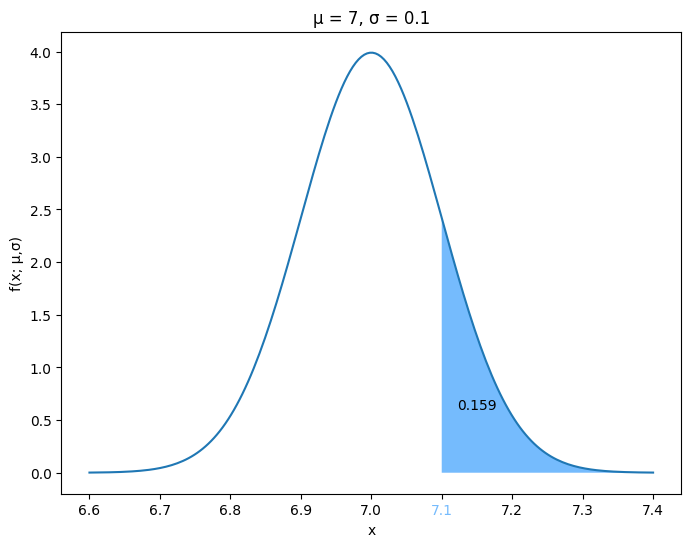

In [5]:
ex4 = shaded_normal_density(7.1, 7, 0.1, lower_tail=False, add_legend=True)

## Inner range of values
#### $P(a < Z < b)$

Shade in the region $P(a < Z < b)$ where $Z∼N(0,1)$ is the standard normal $N(0,1)$

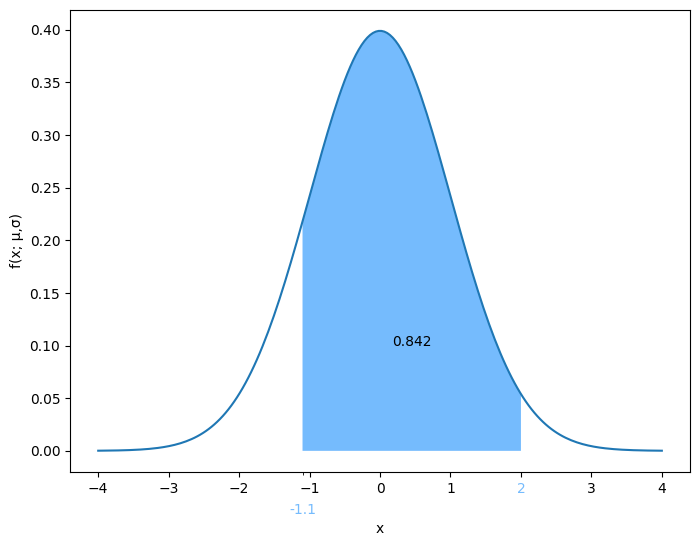

In [6]:
ex5 = shaded_normal_density((-1.1, 2))

#### $P(a < X < b)$

Shade in the region $P(a < X < b)$ where $X∼N(μ,σ)$ is a normal distribution with mean $μ$ and standard deviation $σ$.

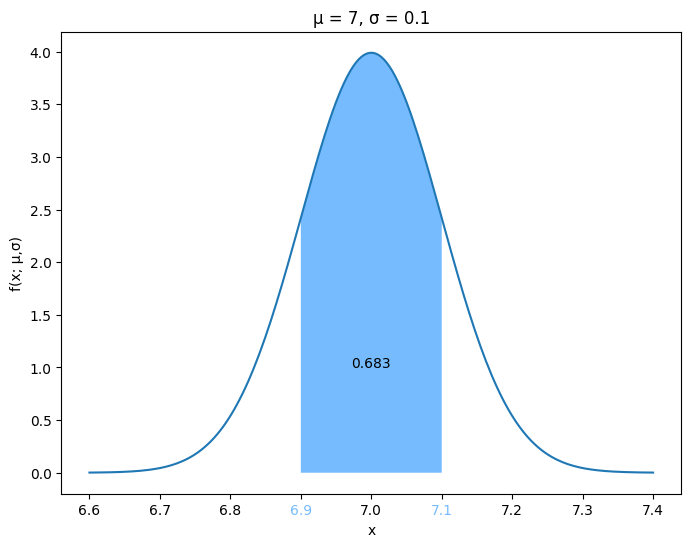

In [7]:
ex6 = shaded_normal_density((6.9, 7.1), 7, 0.1, add_legend=True)

These examples were based off of a lab by [Dr. Irene Vrbik](https://cmps.ok.ubc.ca/about/contact/irene-vrbik/) which can be found on their [website](https://irene.vrbik.ok.ubc.ca/labs/normal-distribution.html).